In this Project, we try to write an algorithm for classification of faults for the provided dataset "Steel Plate Faults".

This dataset consists of 1941 instances having 27 features and divided into 7 different types of steel plate faults. 

## Loading the Data

First we import the basic modules that we need:



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

from sklearn.svm import SVC

from sklearn import tree
from sklearn import preprocessing


We first put our .csv file in the same folder as our .ipynb file, and read it here. We have renamed the .csv file to "Steel.csv" for this project.
The original files were processed in excel and re-saved as a single .csv file with the headers in place.

We now load the data set and store it in a variable called "data".


In [2]:
data=pd.read_csv('Steel.csv')

## Getting to Know the Data

We view the dataframe here.


In [3]:
data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,215.0000,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


The last 7 columns are the dependent faults. Let us understand our data a little better now.

In [4]:
data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,-1.961549,-15.216154,26.084368,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,116.165583,63.035912,119.204964,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-991.000000,-885.000000,0.126200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.229200,0.258300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.100000,-0.149700,0.601500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.524600,-0.074500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,937.000000,402.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [6]:
data.index

RangeIndex(start=0, stop=1941, step=1)

We get a list of the column names here.

In [7]:
data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

This concludes the data loading and exploratory analysis. We’ve seen some simple ways to explore the data, and we’ve also seen how ‘clean’ data can differ from more realistic real-world data.

## Preprocessing of the Data

We copy our data to a new variable so that our original data stays unchanged.

In [8]:
X_data=data.copy()

Now we clean the data. For this, first, we check for any NA values

In [9]:
def printNARows(X_data):
    mask=pd.isna(X_data)
    sums=mask.sum(axis=1)
    naFrame=data[sums>0]
    print(naFrame)

In [10]:
X_data.isnull()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1938,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1939,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
X_data.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [12]:
printNARows(X_data)

Empty DataFrame
Columns: [X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity, Length_of_Conveyer, TypeOfSteel_A300, TypeOfSteel_A400, Steel_Plate_Thickness, Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index, LogOfAreas, Log_X_Index, Log_Y_Index, Orientation_Index, Luminosity_Index, SigmoidOfAreas, Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults]
Index: []

[0 rows x 34 columns]


Since there are no missing values, we check for redundant rows and drop duplicates.

In [13]:
X_data.drop_duplicates(inplace=True)
X_data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,215.0000,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


We see our data is already cleaned.

Let us plot the data

In [14]:
#sns.pairplot(X_data)

And the correlation matrix.

In [15]:
#sns.heatmap(X_data.corr(),cmap='RdBu')

We are using Decision tree to classify the dataframe. For Classification, we attach weights to the 7 faults and add them to a new column named Sum. This will be our target class, consisting of 7 diffferent classes (1, 2, 3, 4, 5, 6, 7).

In [16]:
X_data['Z_Scratch'] = X_data['Z_Scratch'].mul(2)
X_data['K_Scatch'] = X_data['K_Scatch'].mul(3)
X_data['Stains'] = X_data['Stains'].mul(4)
X_data['Dirtiness'] = X_data['Dirtiness'].mul(5)
X_data['Bumps'] = X_data['Bumps'].mul(6)
X_data['Other_Faults'] = X_data['Other_Faults'].mul(7)

In [17]:
X_data['Sum'] = X_data['Pastry'] +X_data['Z_Scratch']+ X_data['K_Scatch']+X_data['Stains'] + X_data['Dirtiness'] +X_data['Bumps'] + X_data['Other_Faults'] 


In [18]:
X_data.Sum.value_counts(normalize=True)

7    0.346728
6    0.207110
3    0.201443
2    0.097888
1    0.081401
4    0.037094
5    0.028336
Name: Sum, dtype: float64

Here, we can see the percentage of values in each of our target class in a decreasing order. 

We can see that about 34% of samples belong to class 7, which are the Other_Faults. Class 5 (Dirtiness) has the least number of samples. 

It is a good idea to visualize our data before we start to do any learning. Some aspects of data visualization are often useful to investigate are the distribution of individual features, and how they relate to the target variable. There’s many ways to visualize distributions, but given that we have 30 features, doing a scatter plot or histogram for all of them might be overly complicated. For some of the plotting and for the later processing it will be convenient to have a dataframe containing only the features, not the target. The easiest way to achieve that is to create a new dataframe with the target dropped.

We save this column in a separate variable

In [19]:
y_data=X_data.pop('Sum')

In [20]:
y_data

0       1
1       1
2       1
3       1
4       1
       ..
1936    7
1937    7
1938    7
1939    7
1940    7
Name: Sum, Length: 1941, dtype: int64

Now we remove the 7 dependent columns from the dataframe and print it.

In [21]:
X_data.pop('Pastry')
X_data.pop('Z_Scratch')
X_data.pop('K_Scatch')
X_data.pop('Stains')
X_data.pop('Dirtiness')
X_data.pop('Bumps')
X_data.pop('Other_Faults')

0       0
1       0
2       0
3       0
4       0
       ..
1936    7
1937    7
1938    7
1939    7
1940    7
Name: Other_Faults, Length: 1941, dtype: int64

In [22]:
X_data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,215.0000
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0213,725.0000,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


<AxesSubplot: >

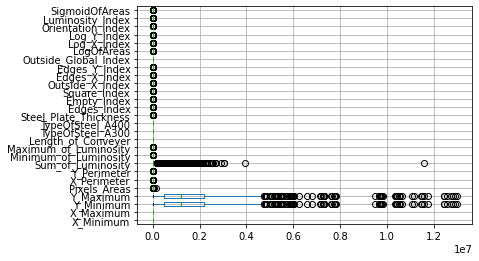

In [23]:
X_data.boxplot(vert=False)

## Classification


For classification, we split the data into training and test data, respectively.

We need to import **train_test_split** from **sklearn.model_selection**


In [24]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, y_Train, y_Test=train_test_split(X_data, y_data, train_size=0.8,test_size=0.2,random_state=42)

In [25]:
print('Size of training set for X:',X_Train.shape[0])
print('Size of training set for y:',y_Train.shape[0])
print('Size of test set for X:',X_Test.shape[0])
print('Size of test set for y:',y_Test.shape[0])

Size of training set for X: 1552
Size of training set for y: 1552
Size of test set for X: 389
Size of test set for y: 389


Now we start by defining a decision tree classifier. And build a decision tree classifier from the training set.


In [26]:
clf = tree.DecisionTreeClassifier(random_state=7)
clf = clf.fit(X_Train, y_Train)

Here, **clf** is our fitted estimator.





And, we predict the class value for X_Test.

In [27]:
y_pred = clf.predict(X_Test)

Let us print our tree.

Text(0.5, 0.98, 'Decision tree, Steel Plate Faults, Training, names and colors')

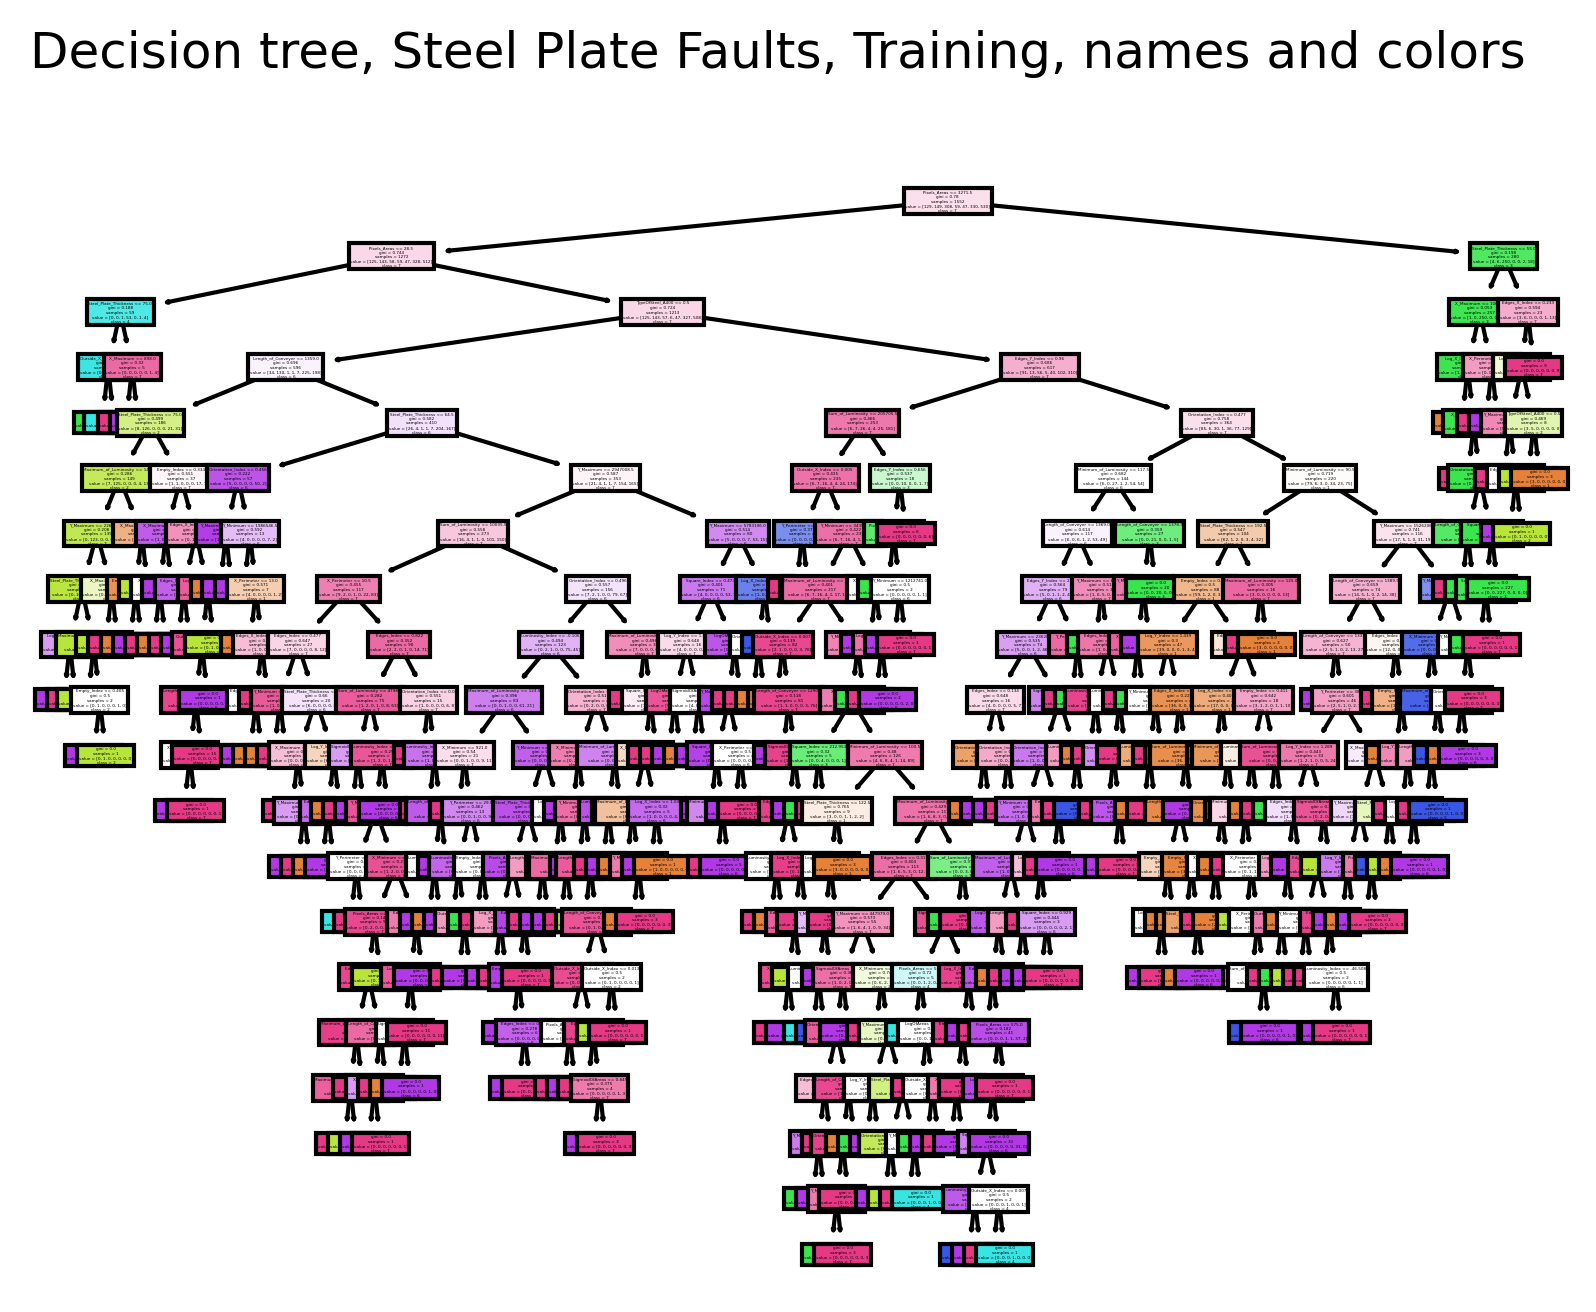

In [28]:
fig=plt.figure(dpi=300)
tree.plot_tree(clf,feature_names=X_Test.columns,class_names=['1','2','3','4','5','6','7'], filled=True)# here we plot the tree
fig.suptitle("Decision tree, Steel Plate Faults, Training, names and colors") # this is the title for the figure


In [29]:
theTree=tree.export_text(clf)
print(theTree)

|--- feature_4 <= 3271.50
|   |--- feature_4 <= 28.50
|   |   |--- feature_13 <= 75.00
|   |   |   |--- feature_17 <= 0.00
|   |   |   |   |--- class: 3
|   |   |   |--- feature_17 >  0.00
|   |   |   |   |--- class: 4
|   |   |--- feature_13 >  75.00
|   |   |   |--- feature_1 <= 898.00
|   |   |   |   |--- class: 7
|   |   |   |--- feature_1 >  898.00
|   |   |   |   |--- class: 6
|   |--- feature_4 >  28.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- feature_10 <= 1359.00
|   |   |   |   |--- feature_13 <= 75.00
|   |   |   |   |   |--- feature_9 <= 142.00
|   |   |   |   |   |   |--- feature_3 <= 2264291.00
|   |   |   |   |   |   |   |--- feature_13 <= 60.00
|   |   |   |   |   |   |   |   |--- feature_21 <= 2.33
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- feature_21 >  2.33
|   |   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |   |--- feature_13 >  60.00
|   |   |   |   |   |   |   |   |--- feature_9 <= 140.50
|

#### Metric Scoring - To quantify the quality of our predictions

We start by creating the confusion matrix.

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_Test,y_pred)
print(cm)

[[ 9  1  1  0  1  7 10]
 [ 0 38  0  0  0  1  2]
 [ 0  0 75  0  0  1  7]
 [ 0  0  0 12  0  1  0]
 [ 0  0  0  0  6  0  2]
 [ 5  0  0  0  2 39 26]
 [13  3  8  3  3 27 86]]


Let us visualize this for both with and without normalization.

Confusion matrix, without normalization
[[ 9  1  1  0  1  7 10]
 [ 0 38  0  0  0  1  2]
 [ 0  0 75  0  0  1  7]
 [ 0  0  0 12  0  1  0]
 [ 0  0  0  0  6  0  2]
 [ 5  0  0  0  2 39 26]
 [13  3  8  3  3 27 86]]
Normalized confusion matrix
[[0.31034483 0.03448276 0.03448276 0.         0.03448276 0.24137931
  0.34482759]
 [0.         0.92682927 0.         0.         0.         0.02439024
  0.04878049]
 [0.         0.         0.90361446 0.         0.         0.01204819
  0.08433735]
 [0.         0.         0.         0.92307692 0.         0.07692308
  0.        ]
 [0.         0.         0.         0.         0.75       0.
  0.25      ]
 [0.06944444 0.         0.         0.         0.02777778 0.54166667
  0.36111111]
 [0.09090909 0.02097902 0.05594406 0.02097902 0.02097902 0.18881119
  0.6013986 ]]


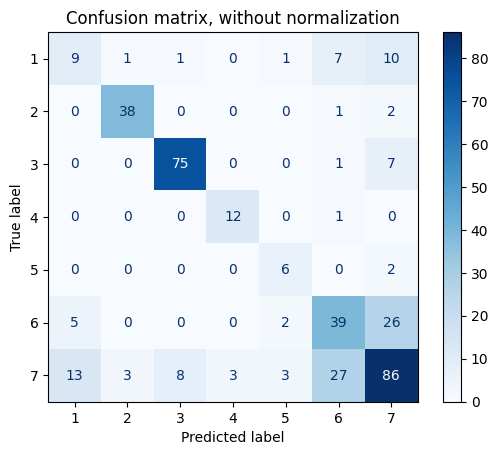

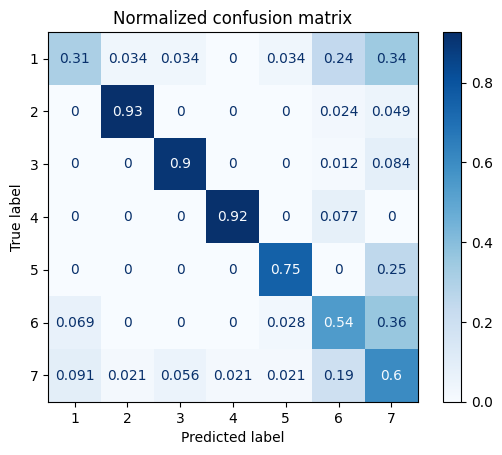

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_Test,
        y_Test,
        display_labels=['1','2','3','4','5','6','7'],
        cmap=plt.cm.Blues,
        normalize=normalize,
        
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

And check the accuracy score

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.6812339331619537


Next, we also generate the classification report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_Test, y_pred))

              precision    recall  f1-score   support

           1       0.33      0.31      0.32        29
           2       0.90      0.93      0.92        41
           3       0.89      0.90      0.90        83
           4       0.80      0.92      0.86        13
           5       0.50      0.75      0.60         8
           6       0.51      0.54      0.53        72
           7       0.65      0.60      0.62       143

    accuracy                           0.68       389
   macro avg       0.66      0.71      0.68       389
weighted avg       0.68      0.68      0.68       389



We can observe that for class 1, the precision is very low. We can consider it on the basis of the number of instances taken for it.

### Hyperparameter tuning

Since, Machine learning models are not intelligent enough to know what hyperparameters would lead to the highest possible accuracy on the given dataset, we perform hyperparamter tuning. 
Hyperparameter values when set right can build highly accurate models. We allow our models to try different combinations of hyperparameters during the training process and make predictions with the best combination of hyperparameter values.

Here we use Grid Search technique.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier(random_state=42)
#Instantiating the grid search model
grid_search = GridSearchCV(estimator=dt,
                        param_grid={'criterion':['gini', 'entropy'],
                                    'max_depth':[2, 3, 5, 10, 20],
                                    'min_samples_leaf':[5, 10, 20, 50, 100]},
                        cv=5,
                        n_jobs=-1,
                        verbose=1,
                        scoring="accuracy")

In [35]:
grid_search.fit(X_Train, y_Train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

Next we print the best hyperparameters

In [36]:
print("Best Hyperparameter:", grid_search.best_params_)

Best Hyperparameter: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}


We can see that **criterion** is the best hyperparameter. So, we use it to predict our new decision tree.

In [37]:
dt_best =grid_search.best_estimator_

Now, we tune the hyperparameter to generate prediction with the best model

In [38]:
y_pred_tuned = dt_best.predict(X_Test)

Now we print the new accuracy score

In [39]:
print(accuracy_score(y_Test, y_pred_tuned))

0.7043701799485861


And Classification report

In [40]:
print(classification_report(y_Test, y_pred_tuned))

              precision    recall  f1-score   support

           1       0.33      0.38      0.35        29
           2       0.93      0.90      0.91        41
           3       0.95      0.90      0.93        83
           4       0.86      0.92      0.89        13
           5       0.67      0.50      0.57         8
           6       0.52      0.61      0.56        72
           7       0.68      0.64      0.66       143

    accuracy                           0.70       389
   macro avg       0.71      0.69      0.70       389
weighted avg       0.72      0.70      0.71       389



We don't observe a huge difference, however the previous situation with the class 1 is quite better in this case.